#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [2]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [3]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [4]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [5]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [6]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [8]:
model = Sequential()

In [8]:
#卷積層1

In [9]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [10]:
model.add(Dropout(rate=0.25))

In [11]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
#卷積層2與池化層2

In [12]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [16]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [15]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [16]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [17]:
model.add(Dense(10, activation='softmax'))

In [18]:
#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [21]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
作業:
請分別選用 "MSE", "binary _crossentropy"
查看Train/test accurancy and loss rate
'''

'\n作業:\n請分別選用 "MSE", "binary _crossentropy"\n查看Train/test accurancy and loss rate\n'

In [20]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=10, batch_size=128, verbose=1)   
model.save('SaveModel/cifarCnnModel.h5')

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 50s 1ms/step - loss: 2.1651 - acc: 0.1981 - val_loss: 2.0517 - val_acc: 0.2961
Epoch 2/10
37500/37500 [==============================] - 40s 1ms/step - loss: 1.9549 - acc: 0.2959 - val_loss: 1.9354 - val_acc: 0.3462
Epoch 3/10
37500/37500 [==============================] - 40s 1ms/step - loss: 1.8339 - acc: 0.3472 - val_loss: 1.8418 - val_acc: 0.3827
Epoch 4/10
37500/37500 [==============================] - 40s 1ms/step - loss: 1.7305 - acc: 0.3817 - val_loss: 1.7488 - val_acc: 0.4177
Epoch 5/10
37500/37500 [==============================] - 40s 1ms/step - loss: 1.6498 - acc: 0.4096 - val_loss: 1.6804 - val_acc: 0.4389
Epoch 6/10
37500/37500 [==============================] - 40s 1ms/step - loss: 1.5858 - acc: 0.4307 - val_loss: 1.6510 - val_acc: 0.4501
Epoch 7/10
37500/37500 [==============================] - 40s 1ms/step - loss: 1.5315 - acc: 0.4535 - val_loss: 1.5874 - val_acc

In [21]:
scores = model.evaluate(x_img_train_normalize, y_label_train_OneHot)
print()
print('accuracy=',scores[1])

50000/50000 [==============================] - 15s 296us/step

accuracy= 0.5331


In [23]:
print(scores)

[1.4302396291351318, 0.5331]


In [22]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型成功!繼續訓練模型


In [24]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=10, batch_size=128, verbose=1)   
model.save('SaveModel/cifarCnnModel.h5')

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 41s 1ms/step - loss: 0.0628 - acc: 0.5109 - val_loss: 0.0652 - val_acc: 0.5283
Epoch 2/10
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0625 - acc: 0.5115 - val_loss: 0.0650 - val_acc: 0.5291
Epoch 3/10
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0626 - acc: 0.5132 - val_loss: 0.0648 - val_acc: 0.5310
Epoch 4/10
37500/37500 [==============================] - 42s 1ms/step - loss: 0.0625 - acc: 0.5124 - val_loss: 0.0647 - val_acc: 0.5298
Epoch 5/10
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0624 - acc: 0.5154 - val_loss: 0.0647 - val_acc: 0.5291
Epoch 6/10
37500/37500 [==============================] - 40s 1ms/step - loss: 0.0623 - acc: 0.5152 - val_loss: 0.0646 - val_acc: 0.5333
Epoch 7/10
37500/37500 [==============================] - 42s 1ms/step - loss: 0.0622 - acc: 0.5175 - val_loss: 0.0645 - val_acc

In [25]:
scores = model.evaluate(x_img_train_normalize, y_label_train_OneHot)
print('mean_squared_error accuracy=',scores[1])

50000/50000 [==============================] - 14s 290us/step
mean_squared_error accuracy= 0.5442


In [26]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型成功!繼續訓練模型


In [27]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=10, batch_size=128, verbose=1)   
model.save('SaveModel/cifarCnnModel.h5')

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 41s 1ms/step - loss: 0.2097 - acc: 0.9179 - val_loss: 0.2188 - val_acc: 0.9125
Epoch 2/10
37500/37500 [==============================] - 40s 1ms/step - loss: 0.2094 - acc: 0.9179 - val_loss: 0.2180 - val_acc: 0.9130
Epoch 3/10
37500/37500 [==============================] - 40s 1ms/step - loss: 0.2087 - acc: 0.9180 - val_loss: 0.2176 - val_acc: 0.9128
Epoch 4/10
37500/37500 [==============================] - 41s 1ms/step - loss: 0.2083 - acc: 0.9184 - val_loss: 0.2172 - val_acc: 0.9132
Epoch 5/10
37500/37500 [==============================] - 40s 1ms/step - loss: 0.2072 - acc: 0.9187 - val_loss: 0.2162 - val_acc: 0.9136
Epoch 6/10
37500/37500 [==============================] - 41s 1ms/step - loss: 0.2075 - acc: 0.9185 - val_loss: 0.2155 - val_acc: 0.9140
Epoch 7/10
37500/37500 [==============================] - 40s 1ms/step - loss: 0.2062 - acc: 0.9192 - val_loss: 0.2154 - val_acc

In [28]:
scores = model.evaluate(x_img_train_normalize, y_label_train_OneHot)
print('binary_crossentropy accuracy=',scores[1])

50000/50000 [==============================] - 15s 296us/step
binary_crossentropy accuracy= 0.914453969078064


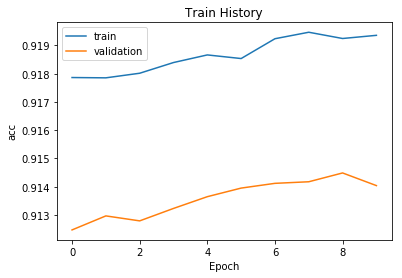

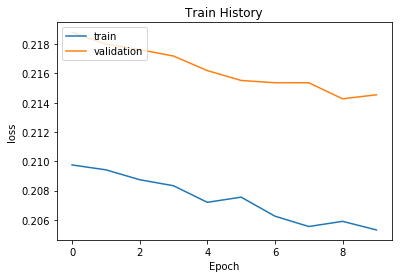

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
show_train_history('acc','val_acc')
show_train_history('loss','val_loss')